# Combine and process Cleanalyze results

Author: **Niels J. de Winter** (*n.j.de.winter@vu.nl*)<br>
Assistant Professor Vrije Universiteit Amsterdam

## Load packages

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Read all cleanalyze data

In [2]:
folder_path = "Cleanalyze_results"
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')] # List all CSV files in the folder
dataframes = {}

for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    dataframes[file] = df

# Print the first few rows of each DataFrame
for file, df in dataframes.items():
    print(f"Data from {file}:")
    print(df.head(), "\n")  # Display the first few rows of each DataFrame
    print(f"Shape: {df.shape}\n")  # Print the shape of the DataFrame
    print(f"Columns: {df.columns.tolist()}\n")  # Print the column names
    print("-" * 40)  # Separator for clarity

Data from B255_peakid.csv:
      depth  proxy_filtered      time         Xpos         Ypos         Ca43  \
0  0.445779        0.013676  62.33211  30944.10620  80703.27530  6301.588000   
1  0.891558        0.000000  62.44125  30944.46978  80703.01737  5301.123838   
2  1.337336        0.019326  62.55040  30944.83337  80702.75945  4600.846556   
3  1.783115        0.037763  62.65955  30945.19695  80702.50152  5751.322804   
4  2.228894        0.013795  62.76871  30945.56053  80702.24359  6251.562891   

    23Na/43Ca  25Mg/43Ca  43Ca/43Ca  55Mn/43Ca  88Sr/43Ca  138Ba/43Ca  \
0  199.059248   1.253571       1000   0.306491   0.013676         0.0   
1  235.482235   3.406310       1000   0.347474   0.000000         0.0   
2  284.331679   1.771388       1000   0.380053   0.019326         0.0   
3  221.307763   3.115197       1000   0.348871   0.037763         0.0   
4  205.558351   1.264443       1000   0.242893   0.013795         0.0   

         peak  
0  interval 0  
1  interval 0  
2  in

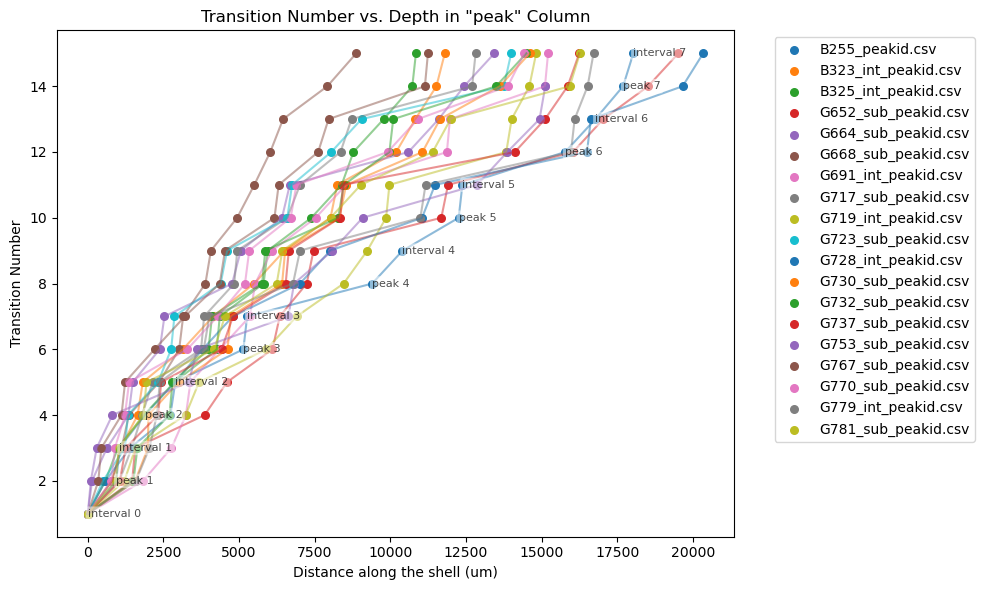

In [14]:
plt.figure(figsize=(10, 6))

for file, df in dataframes.items():
    if 'depth' in df.columns and 'peak' in df.columns:
        transitions = df['peak'] != df['peak'].shift()
        transition_depths = df.loc[transitions, 'depth'].reset_index(drop=True)        
        scatter = plt.scatter(transition_depths, range(1, len(transition_depths) + 1), label=file, s=30)
        plt.plot(transition_depths, range(1, len(transition_depths) + 1), linestyle='-', alpha=0.5, color=scatter.get_facecolor()[0])

# After the for loop, add interval labels inside the plotting area, one per interval
# We'll use the first dataframe as a reference for labeling (or choose any representative one)
ref_file = next((f for f, df in dataframes.items() if 'depth' in df.columns and 'peak' in df.columns), None)
if ref_file:
    ref_df = dataframes[ref_file]
    transitions = ref_df['peak'] != ref_df['peak'].shift()
    transition_depths = ref_df.loc[transitions, 'depth'].reset_index(drop=True)
    peak_labels = ref_df.loc[transitions, 'peak'].reset_index(drop=True)
    for y, label in enumerate(peak_labels, start=1):
        plt.text(
            transition_depths.iloc[y-1], y, str(label),
            va='center', ha='left', fontsize=8, color='black', alpha=0.7,
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.5, boxstyle='round,pad=0.2')
        )

plt.xlabel('Distance along the shell (um)')
plt.ylabel('Transition Number')
plt.title('Transition Number vs. Depth in "peak" Column')
plt.legend(loc='best', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# Next step: Add information about the timing of the peaks and convert to growth curves

In [18]:
timing_sr_spikes = pd.read_csv(
    "Timing_Sr_spikes.csv",
    parse_dates=["Start", "End"]
)
print(timing_sr_spikes.head())
print(timing_sr_spikes.dtypes)

   Number  Containers            Start              End level
0       1         All  24-04-202114:00  25-04-202110:00  High
1       2  Intertidal  11-05-202111:00  12-05-202111:00   low
2       2    Subtidal  11-05-202112:00  12-05-202111:00   low
3       3  Intertidal  31-05-202115:00  01-06-202115:00  High
4       3    Subtidal  31-05-202115:00  01-06-202115:00  High
Number         int64
Containers    object
Start         object
End           object
level         object
dtype: object


C:\Users\nwi213\AppData\Local\Temp\ipykernel_31940\2683137241.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  timing_sr_spikes = pd.read_csv(
C:\Users\nwi213\AppData\Local\Temp\ipykernel_31940\2683137241.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  timing_sr_spikes = pd.read_csv(
